# 0. Project specific imports

In [128]:
import dyn.dyn.datasets.experimental as experimental
import dyn.dyn.datasets.synthetic as synthetic
import dyn.dyn.features.f_fit_functions as qfit
import dyn.dyn.features.optimize_am as optimize_am
import dyn.dyn.features.basic as basic
import dyn.dyn.viz as viz
import numpy as np
import matplotlib.pyplot as plt


viz.init_matplotlib()

# 1. Now, attempt to create and plot a synthetic trajectory between two cells.

## 1.1 Load Osteosarcoma cells

In [129]:
#there are 650 cells in the dataset, so "randomly selecting 650 cells is 
#selecting the whole dataset
n_cells = 650
n_sampling_points = 100

quotient = ["scaling", "rotation"]

cells, cell_shapes, labels_a, labels_b = experimental.load_treated_osteosarcoma_cells(
        n_cells=n_cells, n_sampling_points=n_sampling_points, quotient=quotient
    )

... Selecting only a random subset of 650 / 650 cells.
... Interpolating: Cell boundaries have 100 samplings points.
... Removing potential duplicate sampling points on cell boundaries.

- Cells: quotienting translation.
- Cell shapes: quotienting scaling (length).
- Cell shapes: quotienting rotation.


## 1.2 Generate trajectory

In [130]:
import importlib
importlib.reload(synthetic)

# cell_1 = cell_shapes[0]
# cell_2 = cell_shapes[12]

# cell_1 = cell_shapes[0]
# cell_2 = cell_shapes[10]

cell_1 = cell_shapes[0]
cell_2 = cell_shapes[15]

# cell_1 = cell_shapes[0]
# cell_2 = cell_shapes[20]

a= 1
b=0.5
n_times = 10
n_points=40

trajectory = synthetic.geodesic_between_curves(cell_1, cell_2, a, b, n_times, n_points)

## 1.3 Plot trajectory

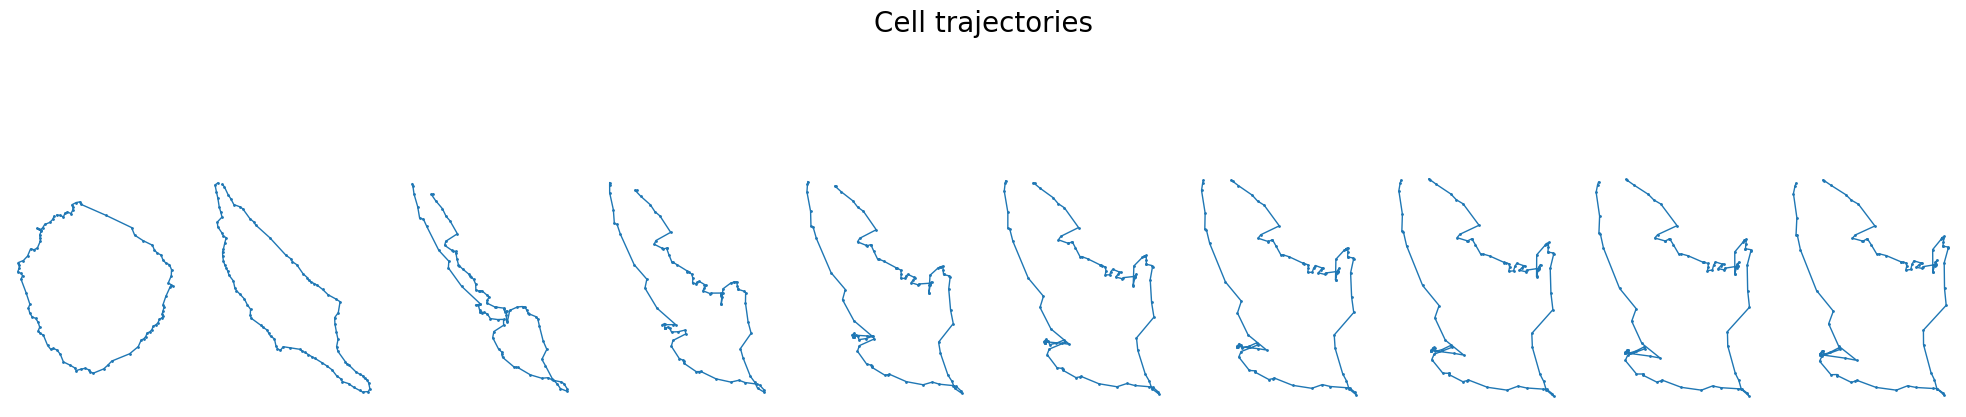

In [131]:
n_traj = 1

fig, axes = plt.subplots(
    n_traj, n_times, figsize=(20, 5), #sharex=True, sharey=True
)

for i_time in range(n_times):
    axes[i_time].plot(
        trajectory[i_time][:, 0], trajectory[i_time][:, 1], 
        marker="o", markersize=1, linewidth=1
    )
    axes[i_time].axis('scaled')
    axes[i_time].axis("off")
#     axes[i_time].set_aspect("equal")

fig.suptitle("Cell trajectories", fontsize=20, y=1.0)
plt.tight_layout()

success.

## Now, repeat with regression model

In [143]:
import importlib
importlib.reload(synthetic)

synthetic.trajectory_between_curves_regression(
    cell_1, cell_2, a, b, degree=1, n_times=20, n_points=40
)

LinAlgError: Last 2 dimensions of the array must be square

# 2.0 Use metric learning code to find a*, m*

In [120]:
optimize_am.find_best_am(trajectory, init_a = 1, a_lr = 0.05)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
a: 1 r2_val: 1.0 mse_val: 1.0900959197081507e-21 var_val: 73.415147872464 mse_train: 3.3232402775037144e-22
a: 1.0000000000031237 r2_val: 1.0 mse_val: 7.470558641873703e-19 var_val: 73.41514787249707 mse_train: 5.2707234340151374e-20
a: 0.9999999996747174 r2_val: 0.9999999999999999 mse_val: 8.245867149387237e-15 var_val: 73.4151478690171 mse_train: 5.615604667740466e-16
a: 1.0000000342010549 r2_val: 0.9999999999987585 mse_val: 9.114111784373102e-11 var_val: 73.41514823486207 mse_train: 6.208704823868691e-12
a: 0.9999964043438404 r2_val: 0.9999999862783288 mse_val: 1.0073780002960114e-06 var_val: 73.41510983118529 mse_train: 6.862428274354194e-08
---> DEGREE: 1; BEST A: 0.9999964043438404;R2: 0.9999999862783288 ; R2_SRV: 1.0

a: 1 r2_val: 1.0 mse_val: 2.326000834143817e-20 var_val: 73.415147872464 mse_train: 1.9734218227465855e-22
a: 1.0000000000170286 r2_val: 1.0 mse_val:

(0.9999964043438404,
 1.0,
 0.9999999862783288,
 array([ 9.99999986e-01, -1.17177092e+01, -1.01523803e+03, -3.99972147e+03,
        -1.32391754e+05]),
 array([1., 1., 1., 1., 1.]),
 {0: {'a': [1,
    1.0000000000031237,
    0.9999999996747174,
    1.0000000342010549,
    0.9999964043438404],
   'r2_train': [1.0, 1.0, 1.0, 0.9999999999999154, 0.999999999065257],
   'r2_val': [1.0,
    1.0,
    0.9999999999999999,
    0.9999999999987585,
    0.9999999862783288],
   'mse_train': [3.3232402775037144e-22,
    5.2707234340151374e-20,
    5.615604667740466e-16,
    6.208704823868691e-12,
    6.862428274354194e-08],
   'mse_val': [1.0900959197081507e-21,
    7.470558641873703e-19,
    8.245867149387237e-15,
    9.114111784373102e-11,
    1.0073780002960114e-06]},
  1: {'a': [1,
    1.0000000000170286,
    0.9999999911328684,
    1.0000046261782187,
    0.9975864290408238,
    2.2580285862335296,
    12.223892927835156,
    22.242908052132115,
    31.361080725478192,
    33.380140641319926,
   